## 의사결정 나무(Decision Tree)
- 분류 기법 적용에서 가장 많이 사용하는 방법
- 노드(Node, 마디)와 아크(Arc, 가지)로 구성
- 분류 작업을 수행하기 위해 한 번에 한 특성 변수씩 해석(e.g. 스무고개처럼; 날개 --> 날 수?/지느러미?)
- 결정 나무 모델을 사용하면 분석 과정을 설명하기 수월함

- 선형회귀 모델은 특성들을 대상으로 곱셈이나 덧셈과 같은 연산을 하고 그 값을 기준으로 회귀나 분류를 예측
- 결정 나무는 이와 달리 각 특성을 독립적으로 하나씩 검토하여 분류 작업을 수행
- 결정 나무도 분류와 회귀에 모두 이용 가능
- 분류용 모델은 DecisionTreeClassifier, 회귀분석 모델은 DecisionTreeRegressor

In [17]:
from IPython.display import Image
Image(url='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbGlghI%2FbtqwYFXZzCu%2F0g4cMFuumUkKDYmDfkMdu0%2Fimg.png')

In [18]:
Image(url='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbJSlvg%2FbtqwXHvdrPJ%2FZhikSUKx3SmuYZSz6NGZL1%2Fimg.png')

In [19]:
Image(url='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbUvjhU%2FbtqwYiIK85s%2FoQ3KuTZVk6CgSAQI0VkwW1%2Fimg.png')

### 결정 나무의 복잡도(과적합) 제어
- 나무를 너무 상세하게 나누면 과적합의 가능성 높아짐, 훈련데이터에 포함된 이상치를 모두 찾아 냄
- 노드(마디) 생성을 미리 중단하는 사전 가지치기(pre-pruning)와 나무를 만든 후에 영향력이 낮은 노드를 삭제하는 사후 가지치기(pruning)가 있음
- sciki-learn에서는 사전 가지치기만 지원
- 사전 가지치기는 나무의 최대 깊이(max_depth)를 제한

In [4]:
%matplotlib inline
import mglearn
import sklearn

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [1]:
print("Train set accuracty: {:.3f}".
print("Test set accuracy: {:.3f}".

SyntaxError: unexpected EOF while parsing (<ipython-input-1-4ee786000e4d>, line 2)

### 나무의 최대 깊이를 제한
- 깊이를 4로 제한했더니 테스트 데이터의 성능이 향상(과대적합을 줄임)

### 결정 나무 나무 그래프 그리기
- 결정 나무의 장점은 변수의 특성과 분석의 과정을 단계적으로 파악할 수 있다는 것임 
- 예측 알고리즘을 살펴보기 쉬움
- 깊이가 너무 깊어지면 알아보기 힘듦

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=['악성', '양성'], feature_names=cancer.feature_names, impurity=False, filled=True)

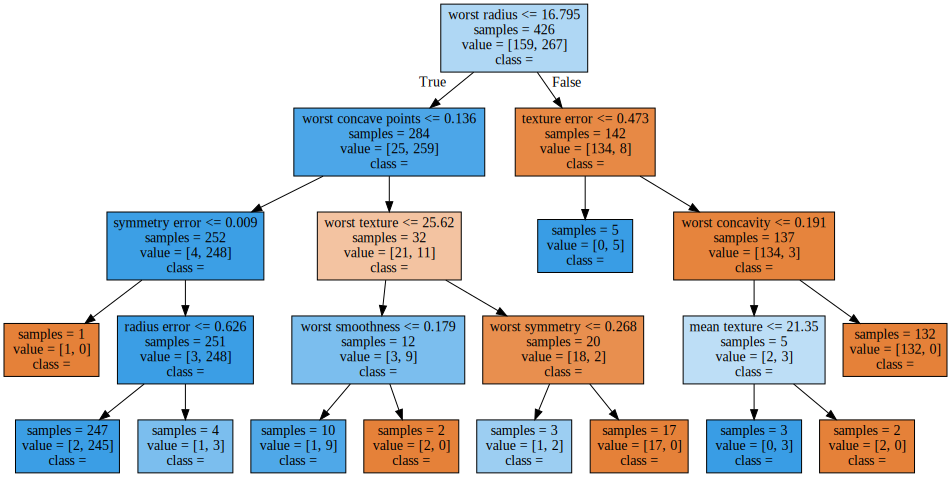

In [9]:
import graphviz
with open("tree.dot", 'rt', encoding='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 나무의 특성 중요도
- 나무를 만드는 과정에서 각 특성이 얼마나 기여했는지를 알 수 있음
- 이를 특성 중요도(feature importance)라고 하며 0~1 값을 가짐
- 0은 영향력이 없다(분류에 사용되지 않음)는 것이며 전체 특성 중요도 값의 합은 1

In [10]:
print("특성중요도:\n{}".

특성중요도:
[0.         0.01258462 0.         0.         0.         0.
 0.         0.         0.         0.         0.0024156  0.04839825
 0.         0.         0.         0.         0.         0.
 0.01019737 0.         0.72682851 0.03323127 0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [12]:
import matplotlib.pyplot as plt

import numpy as np

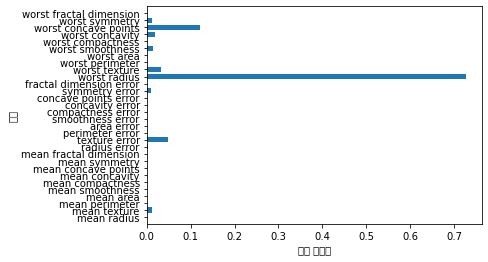

In [15]:
def plot_feature_importances_cancer(model):

    n_features = cancer.data.shape[1]

    plt.barh(range(n_features),model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features),cancer.feature_names)

    plt.xlabel("특성 중요도")

    plt.ylabel("특성")

    plt.ylim(-1,n_features)

result = tree.feature_importances_
result

plot_feature_importances_cancer(tree)

In [16]:
import pandas as pd
res=pd.DataFrame(result)
res["name"]= cancer.feature_names
res

,0,name
0,0.000000,mean radius
1,0.012585,mean texture
2,0.000000,mean perimeter
3,0.000000,mean area
4,0.000000,mean smoothness
5,0.000000,mean compactness
6,0.000000,mean concavity
7,0.000000,mean concave points
8,0.000000,mean symmetry
9,0.000000,mean fractal dimension


- worst radius의 비중이 큰 것을 알 수 있으며 이 값에서 루트 노드가 시작됨
- 주의할 점은 feature importance가 낮다고 해서 그 특징이 중요하지 않다는 것은 아님, 단지 결정나무에서 사용 정도가 낮음, 추가 분석 필요

## 결정나무의 앙상블모델 - Random Forest, Gradient Boosting

- 몇 가지 모델들을 연결해 장점을 위주로 활용하는 모델

In [22]:
%matplotlib inline
import mglearn
import sklearn
import graphviz
import pandas as pd

### 랜덤 포레스트
- 여러 결정 나무를 묶어 결정나무의 과대적합 문제를 완환
- 나무를 '랜덤하게' 여러 가지의 나무를 만들고 이들의 평균을 취함
- 랜덤한 속성을 부여하는 방법으로 sample을 랜덤하게 취하거나 특성을 랜덤하게 취함
- 평균을 구할 전체 나무의 수를 정해줌(n_estimators)
- Data를 랜덤하게 취하기 위해 부트스트랩 sampling을 함(같은 수의 sample을 취하되 중복 sampling 허용), sample수가 100개라면 한 번도 sampling 되지 않은 sample 수가 36%
- 몇 개의 특성을 사용할 지도 지정(max_features)
- 특성을 선택하는 작업은 각 노드에서 반복되므로 다른 특성을 사용하게 됨
- 분류의 경우는 확률을 고려한 투표를 진행(대표값 하나만 투표하지 않고 여러 가능성의 가중평균을 구함)
- e.g. 남자와 여자를 구분, 100개의 나무를 만들었더니 85 vs. 25 --> 남자

In [21]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png')

### 무작위성
#### 부트스트랩
- n개의 훈련데이터에서 무작위로 추출해 m개의 데이터셋을 만듦
- 중복추출이 가능하며 하나의 부트스트랩 샘플엔 약 1/3정도의 샘플이 누락([a,b,c,d]==>[b,d,d,c], [d,a,a,b]
- 노드(마디) 분할에 사용할 특성을 랜덤하게 선택
- 랜덤 포레스트의 나무는 모두 다르게 생성됨
- max_features == n_features: 모든 특성을 사용, 비슷한 나무들이 생성
- max_features == 1: 노드 분할을 무작위로 수행, 많이 다르고 깊은 나무를 생성

#### 예제
- 유방암 데이터로 100개의 나무를 만듦
- 성능이 개선되었는지 확인
- 특성 중요도를 그림으로 작성(단일 나무의 경우보다 많은 특성이 사용되고 있음), 단일 나무보다 신뢰성이 더 높아짐

In [2]:
%matplotlib inline
import mglearn
import sklearn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split







In [3]:
def plot_feature_importances_cancer(model):

    n_features = cancer.data.shape[1]

    plt.barh(range(n_features),model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features),cancer.feature_names)

    plt.xlabel("특성 중요도")

    plt.ylabel("특성")

    plt.ylim(-1,n_features)

plot_feature_importances_cancer(forest)

NameError: name 'forest' is not defined

#### 장단점
- 회귀와 분류에서 가장 널리 사용되는 알고리즘
- 성능이 뛰어난 편이며 매개변수 튜닝부담이 낮음(기본 값으로 잘 돌아감)
- n_estimator는 클수록 성능이 좋아짐
- 대량의 데이터에도 잘 작동(훈련 시간은 오래 걸리는 편)
- 랜덤하므로 결과 모델이 매번 달라질 수 있음
- 텍스트 데이터처럼 차원이 높고 희소한 데이터에는 잘 맞지 않음
- 선형모델보다 메모리 사용량이 많고 휸련과 예측이 느린 편

### 그래디언트 부스팅 회귀 트리
- 랜덤한 방식으로 나무의 앙상블을 구하는 것이 아니라 이전의 나무의 성능을 단계적으로 보완하는 방식으로 작동
- 오차를 줄이는 방향으로 나무를 추가하는 방식(에러를 줄이는 방식의 경사하강법 사용)
- 깊지 않은 나무를 사용함으로써 학습속도가 빠름
- 학습속도(learning rate)를 미세하게 조정해 줌
- (무작위성 대신) 사전 가지치기를 사용
- 가장 성능이 좋은 알고리즘으로 분류 및 예측 모두에 사용됨
- 시간을 두고 미세하게 성능을 높이기 위한 과제에 주로 활용

#### 유방암 예측 예제
- 기본값으로 나무 깊이는 3, 나무 수는 100개

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, random_state=0)



print("Train set accuracty: {:.3f}".format(gdb.score(X_train,y_train)))
print("Test set accuracy: {:.3f}".format(gdb.score(X_test,y_test)))

NameError: name 'gdb' is not defined

- 훈련 세트의 정확도가 100%이므로 과대적합 됨
- 과대적합을 완화하기 위해 나무의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수도 있음 

In [37]:
gdb

GradientBoostingClassifier(random_state=0)

In [5]:
gdb = GradientBoostingClassifier(random_state=0, max_depth=1)
gdb.fit(X_train, y_train)

plot_feature_importances_cancer(gdb)

NameError: name 'plt' is not defined

- 그래디언트 부스팅은 일부 특성을 완전히 무시(vs.랜덤 포레스트)

#### 장단점
- 기본적으로 랜덤 포레스트를 사용하고 이후 미세한 성능 향상을 위해서 GB 방식 사용하는 경향
- 희소한 고차원의 데이터에 대해서는 잘 작동하지 않음
- 학습속도를 늦추면 보통 더 많은 나무를 사용해야 함
- 랜덤 포레스트에서는 나무 수가 많을 수록 성능이 개선되나 GB의 경우는 과적합이 될 수 있음
- 나무의 깊이는 보통 5이하를 권장